In [3]:
import pandas as pd
import numpy as np
import zipfile
import json
import os
import glob
import sklearn
from sklearn.cluster import KMeans, MiniBatchKMeans
from wordcloud import WordCloud

## Import all csv files from folder

In [4]:
print('Get current working directory : ', os.getcwd())

Get current working directory :  /Users/natzad/Downloads/data/5_domestic_filter_Ngram_stopwords_lemmatize


In [5]:
# use glob to get all the csv files in the folder

path = os.getcwd()
files = glob.glob(os.path.join(path, "*.csv"))

In [6]:
df = []

In [7]:
for f in files:
    csv = pd.read_csv(f)
    df.append(csv)

In [8]:
df = pd.concat(df)

In [9]:
df.head()

Unnamed: 0  article_id                                      article_title  \
0           0    16599877     ACCA holds first Virtual Career &amp; Job Fair   
1           1    18058465  'Vindictive' Akufo-Addo behind Mahama's EOCO p...   
2           2    20001894             GCB wipes off UT bank logo at branches   
3           3    19754947              Armyworms not defeated yet - Suhuyini   
4           4    20803299  Akufo-Addo celebrates 'legend of the ages' JH ...   

        publisher  year                                       article_text  \
0  Starr 103.5 FM  2017   ACCA holds first Virtual Career &amp; Job Fai...   
1  Starr 103.5 FM  2017  ' Vindictive' Akufo Addo behind Mahama's EOCO ...   
2  Starr 103.5 FM  2017   GCB wipes off UT bank logo at branches. Rebra...   
3  Starr 103.5 FM  2017   Armyworms not defeated yet Suhuyini. Farmers ...   
4  Starr 103.5 FM  2017   Akufo Addo celebrates' legend of the ages' J....   

                                     country_mention  Domestic  \
0                                     [('Ghana', 2)]      True   
1                      [('Ghana', 1), ('Turkey', 1)]      True   
2  [('Ghana', 1), ('United States', 1), ('Germany...      True   
3                                                 []      True   
4                [('Ghana', 1), ('South Africa', 1)]      True   

                                  article_text_Ngram  \
0   ACCA holds first Virtual Career &amp; Job Fai...   
1  ' Vindictive' Akufo Addo behind Mahama's EOCO ...   
2   GCB wipes off UT bank logo at branches. Rebra...   
3   Armyworms not defeated yet Suhuyini. Farmers ...   
4   Akufo Addo celebrates' legend of the ages' J....   

                         article_text_Ngram_stopword  \
0  ACCA holds first Virtual Career & amp ; Job Fa...   
1  ' Vindictive ' Akufo Addo behind Mahama 's EOC...   
2  GCB wipes UT bank logo branches . Rebranding h...   
3  Armyworms defeated yet Suhuyini . Farmers Tama...   
4  Akufo Addo celebrates ' legend ages ' J.H . Nk...   

               article_text_Ngram_stopword_lemmatize  
0  ACCA hold first Virtual Career amp Job Fair Th...  
1  Vindictive Akufo Addo behind Mahama 's EOCO pe...  
2  GCB wipe UT bank logo branch Rebranding head o...  
3  Armyworms defeat yet Suhuyini Farmers Tamale N...  
4  Akufo Addo celebrates legend age J.H Nketia Pr...

## Keep only Article ID & Final Text Column

In [10]:
cols = df[['article_id', 'article_text_Ngram_stopword_lemmatize']]

In [11]:
cols.head()

article_id              article_text_Ngram_stopword_lemmatize
0    16599877  ACCA hold first Virtual Career amp Job Fair Th...
1    18058465  Vindictive Akufo Addo behind Mahama 's EOCO pe...
2    20001894  GCB wipe UT bank logo branch Rebranding head o...
3    19754947  Armyworms defeat yet Suhuyini Farmers Tamale N...
4    20803299  Akufo Addo celebrates legend age J.H Nketia Pr...

In [12]:
cols.shape

(724281, 2)

## Check for duplicates in columns

In [13]:
duplicateRows1 = cols[cols.duplicated(['article_id'])]

In [14]:
duplicateRows1

article_id              article_text_Ngram_stopword_lemmatize
23723    13529101  France stun jihadist attack knife wield men bu...
23724    15859924  According World Health Organization 100 millio...
23725     7456205  Hillary Clinton Bernie Sanders pitch battle De...
23726     8171485  He later give two payment 100,000 mother May J...
23727     7590614  Mr Trump businessman experience elect office l...
...           ...                                                ...
39509     7326066  Under DLA people complete application form rea...
39510    15827277  Image copyrightHULTON ARCHIVEImage caption The...
39511    15075971  But highlight fear former clerk Commons summon...
39512     7857415  Security step key site across UK Wednesday mor...
39513     7407516  Some 350 must leave UK end March Home Office r...

[15791 rows x 2 columns]

In [15]:
duplicateRows2 = cols[cols.duplicated(['article_text_Ngram_stopword_lemmatize'])]

In [16]:
duplicateRows2

article_id              article_text_Ngram_stopword_lemmatize
658      31909841  Akufo Addo accepted flagbearer NPP Election 20...
1043     84574701  Welbeck play Watford donate food sanitary item...
1173     31733374  A trader Yeji left angry tricked buying baby l...
1176     84800176  The news go viral social medium detail concern...
2570     31239391  Select The Best Candidates John Mahama To Dele...
...           ...                                                ...
29672    61780237  Joey Muthengi The official tusker star faceboo...
29697    61783005  A police officer Zimbabwe arrest use toilet re...
29881    61525548  The Directorate Criminal Investigations DCI di...
30013    62015138  A fire broken Tsavo National Park Wednesday de...
30626    82212218  Based current location select North America ed...

[20821 rows x 2 columns]

In [17]:
ids = cols['article_id']

In [18]:
titles = cols['article_text_Ngram_stopword_lemmatize']

In [19]:
cols[ids.isin(ids[ids.duplicated()])].sort_values("article_id")

article_id              article_text_Ngram_stopword_lemmatize
33469        5285  Chile becomes sixth country ban Brazilian beef...
1529         5285  Chile becomes sixth country ban Brazilian beef...
26418        5516  Obedience To Authority Should We Trust The Gov...
10269        5516  Obedience To Authority Should We Trust The Gov...
7963         7124  Nathan Eagle Dumb phone future advertising Thi...
...           ...                                                ...
29572    85902834  Perth Wake Park Things Sports Greater Perth Ph...
29551    86034240  The Boys Band Film Drama Recommended 4 5 star ...
13402    86034240  The Boys Band Film Drama Recommended 4 5 star ...
13411    86041438  The Mothman Prophecies Film Horror Time Out sa...
29560    86041438  The Mothman Prophecies Film Horror Time Out sa...

[31582 rows x 2 columns]

In [20]:
cols[ids.isin(titles[titles.duplicated()])].sort_values("article_text_Ngram_stopword_lemmatize")

Empty DataFrame
Columns: [article_id, article_text_Ngram_stopword_lemmatize]
Index: []

In [21]:
cols_no_dupes = cols.drop_duplicates(subset=['article_id', 'article_text_Ngram_stopword_lemmatize'], keep='first')

In [22]:
cols_no_dupes.shape

(708490, 2)

## Check for null values in text column & drop

In [23]:
cols_no_dupes.isna().sum()

article_id                                 0
article_text_Ngram_stopword_lemmatize    691
dtype: int64

In [24]:
nan_values = cols_no_dupes[cols_no_dupes['article_text_Ngram_stopword_lemmatize'].isna()]

In [25]:
nan_values

article_id article_text_Ngram_stopword_lemmatize
4557     20287259                                   NaN
4575     20487657                                   NaN
4618     18999161                                   NaN
4660     20624440                                   NaN
4679     17460628                                   NaN
...           ...                                   ...
42944    15463318                                   NaN
42994    15302371                                   NaN
43032    15647617                                   NaN
43035    15601925                                   NaN
43070    15278429                                   NaN

[691 rows x 2 columns]

In [26]:
clean_cols = cols_no_dupes.dropna()

## Clean df with no duplicates or null values

In [27]:
clean_cols.head()

article_id              article_text_Ngram_stopword_lemmatize
0    16599877  ACCA hold first Virtual Career amp Job Fair Th...
1    18058465  Vindictive Akufo Addo behind Mahama 's EOCO pe...
2    20001894  GCB wipe UT bank logo branch Rebranding head o...
3    19754947  Armyworms defeat yet Suhuyini Farmers Tamale N...
4    20803299  Akufo Addo celebrates legend age J.H Nketia Pr...

In [28]:
clean_cols.shape

(707799, 2)

## Text Preprossing 

### Make all lowercase

In [29]:
clean_cols['LC_article_text_Ngram_stopword_lemmatize'] = clean_cols['article_text_Ngram_stopword_lemmatize'].str.lower()

/var/folders/pd/q67ljvk140n0pd9zr7_g9k7m0000gn/T/ipykernel_33004/3485381015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_cols['LC_article_text_Ngram_stopword_lemmatize'] = clean_cols['article_text_Ngram_stopword_lemmatize'].str.lower()


In [30]:
clean_cols.head()

article_id              article_text_Ngram_stopword_lemmatize  \
0    16599877  ACCA hold first Virtual Career amp Job Fair Th...   
1    18058465  Vindictive Akufo Addo behind Mahama 's EOCO pe...   
2    20001894  GCB wipe UT bank logo branch Rebranding head o...   
3    19754947  Armyworms defeat yet Suhuyini Farmers Tamale N...   
4    20803299  Akufo Addo celebrates legend age J.H Nketia Pr...   

            LC_article_text_Ngram_stopword_lemmatize  
0  acca hold first virtual career amp job fair th...  
1  vindictive akufo addo behind mahama 's eoco pe...  
2  gcb wipe ut bank logo branch rebranding head o...  
3  armyworms defeat yet suhuyini farmers tamale n...  
4  akufo addo celebrates legend age j.h nketia pr...

In [31]:
def word_count(text):
    word2cnt = dict()
    for word in text.split():
        if word in word2cnt: word2cnt[word] += 1
        else: word2cnt[word] = 1
        return word2cnt

In [32]:
#clean_cols['word_count'] = clean_cols['article_text_Ngram_stopword_lemmatize'].apply(word_count)

In [33]:
clean_cols['unique_words'] = clean_cols['article_text_Ngram_stopword_lemmatize'].apply(lambda x: len(set(x.split(' '))))

/var/folders/pd/q67ljvk140n0pd9zr7_g9k7m0000gn/T/ipykernel_33004/4152285925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_cols['unique_words'] = clean_cols['article_text_Ngram_stopword_lemmatize'].apply(lambda x: len(set(x.split(' '))))


In [34]:
clean_cols.head()

article_id              article_text_Ngram_stopword_lemmatize  \
0    16599877  ACCA hold first Virtual Career amp Job Fair Th...   
1    18058465  Vindictive Akufo Addo behind Mahama 's EOCO pe...   
2    20001894  GCB wipe UT bank logo branch Rebranding head o...   
3    19754947  Armyworms defeat yet Suhuyini Farmers Tamale N...   
4    20803299  Akufo Addo celebrates legend age J.H Nketia Pr...   

            LC_article_text_Ngram_stopword_lemmatize  unique_words  
0  acca hold first virtual career amp job fair th...           118  
1  vindictive akufo addo behind mahama 's eoco pe...           133  
2  gcb wipe ut bank logo branch rebranding head o...           128  
3  armyworms defeat yet suhuyini farmers tamale n...           193  
4  akufo addo celebrates legend age j.h nketia pr...           244

## TF-IDF

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
text_content = clean_cols['article_text_Ngram_stopword_lemmatize']

vector = TfidfVectorizer(max_df=0.5,         # drop words that occur in more than X percent of documents
                             min_df=.01,      # only use words that appear at least X times
                             stop_words='english', # remove stop words
                             lowercase=True, # Convert everything to lower case 
                             use_idf=True,   # Use idf
                             norm=u'l2',     # Normalization
                             smooth_idf=True # Prevents divide-by-zero errors
                            )

In [37]:
tfidf = vector.fit_transform(text_content)

In [38]:
#v = TfidfVectorizer()
#x = v.fit_transform(clean_cols['LC_article_text_Ngram_stopword_lemmatize'])

In [39]:
#tfidf_df = pd.DataFrame(x.toarray(), columns=v.get_feature_names())

In [40]:
tfidf_as_array = tfidf.toarray()
len(tfidf_as_array)

707799

In [41]:
#the length of the array is same as te length of our document list

## Elbow Method

We're looking for a point where the curve starts to flatten out. This method uses inertia to determine the number of clusters. The inertia is the sum of the squared distances from each point to the cluster center. We can calculate this for a sequence of different cluster values, plot them, and look for the elbow.

Plot the SSE for a range of cluster sizes. We look for the "elbow" where the SSE begins to level off. 

In [42]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


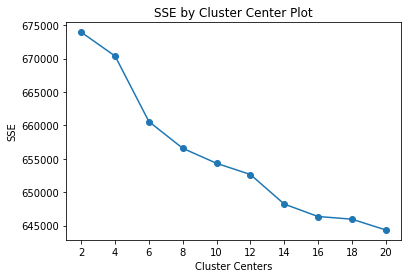

In [44]:
find_optimal_clusters(tfidf, 20)

In [45]:
# flattens out at 16 clusters

## Shilouette Score

Another method for calculating the best cluster centers is the Silhouette Coefficient. The Silhouette Coefficient is calculated using the mean intra-cluster distance and the mean nearest-cluster distance for each sample. In other words, the distance between a sample and the nearest cluster that the sample is not a part of2.

The best value is 1, and the worst is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar versus the one it's assigned. Let's calculate these scores for various cluster centers values as well.

COMPUTER CRASHES HERE

In [47]:
from sklearn.metrics import silhouette_score

In [48]:
def get_silhouette_score(X, k):
    for n_clusters in range(2, k):
        #clusterer = KMeans(init="k-means++", n_clusters=n_clusters, random_state=42)
        clusterer = MiniBatchKMeans(n_clusters=n_clusters, init_size=1024, batch_size=2048, random_state=20)
        y = clusterer.fit_predict(X)

        message = "For n_clusters = {} The average silhouette_score is: {}"
        print(message.format(n_clusters, silhouette_score(X, y)))

In [50]:
#get_silhouette_score(tfidf, 20)

## Clustering KMeans 

Using MINIBATCHKMEANS over regular KMEANS --  "Mini Batch K-means has been proposed as an alternative to the K-means algorithm for clustering massive datasets. The advantage of this algorithm is to reduce the computational cost by not using all the dataset each iteration but a subsample of a fixed size. This strategy reduces the number of distance computations per iteration at the cost of lower cluster quality." (J.BEJAR)

In [46]:
from sklearn.cluster import MiniBatchKMeans

In [47]:
k = 16
kmeans = MiniBatchKMeans(n_clusters = k, init_size=1024, batch_size=2048, random_state=20)
kmeans.fit(tfidf)

MiniBatchKMeans(batch_size=2048, init_size=1024, n_clusters=16, random_state=20)

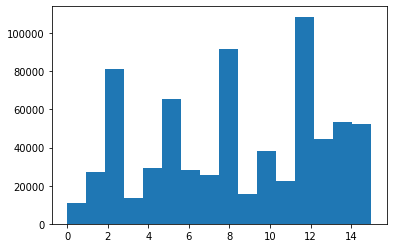

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(kmeans.labels_, bins=k)
plt.show()

In [74]:
#score = silhouette_score(tfidf, clusters.labels_, metric='euclidean')
#print('Silhouetter Score: %.3f' % score)

In [49]:
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = vector.get_feature_names()

/Users/natzad/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [48]:
terms

['000',
 '10',
 '100',
 '11',
 '12',
 '120',
 '13',
 '14',
 '15',
 '150',
 '16',
 '17',
 '18',
 '19',
 '1970s',
 '1980s',
 '199',
 '1990s',
 '1995',
 '1998',
 '1999',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '201',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '20th',
 '21',
 '22',
 '23',
 '24',
 '25',
 '250',
 '26',
 '27',
 '28',
 '29',
 '30',
 '300',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '400',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '500',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '600',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '70',
 '700',
 '72',
 '75',
 '80',
 '800',
 '85',
 '90',
 '95',
 '99',
 'abandon',
 'abdul',
 'ability',
 'able',
 'abroad',
 'absence',
 'absolute',
 'absolutely',
 'abuja',
 'abuse',
 'abusive',
 'abut',
 'academic',
 'academy',
 'accelerat

In [50]:
# Centers of the clusters

for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:10]:
        word_list.append(terms[j])
    print(word_list) 

cluster0:
['bank', 'banking', 'loan', 'financial', 'rate', 'customer', 'central', 'account', 'cent', 'market']
cluster1:
['police', 'arrest', 'officer', 'suspect', 'man', 'incident', 'investigation', 'charge', 'crime', 'woman']
cluster2:
['people', 'woman', 'child', 'like', 'life', 'family', 'time', 'work', 'know', 'love']
cluster3:
['fr', 'yu', 'frm', 'wh', 'pint', 'nt', 'yur', 'ne', 'ut', 'mre']
cluster4:
['health', 'patient', 'hospital', 'disease', 'medical', 'cancer', 'covid', 'dr', 'case', 'people']
cluster5:
['company', 'market', 'cent', 'business', 'price', 'million', 'growth', 'investment', 'billion', 'oil']
cluster6:
['film', 'music', 'song', 'movie', 'album', 'actor', 'band', 'star', 'like', 'release']
cluster7:
['court', 'judge', 'case', 'justice', 'charge', 'sentence', 'mr', 'accuse', 'trial', 'guilty']
cluster8:
['government', 'minister', 'country', 'state', 'india', 'president', 'national', 'people', 'mr', 'jamaica']
cluster9:
['cooky', 'use', 'race', 'website', 'site', '

In [51]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

In [33]:
IGNORE FOR NOW 

def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

SyntaxError: invalid syntax (3516917577.py, line 1)

In [34]:
#plot_tsne_pca(tfidf, kmeans)

In [35]:
#k = 16
#tfidf_reduced = TruncatedSVD(n_components=k, random_state=0).fit_transform(tfidf)

In [52]:
def generate_wordclouds(X, in_X_tfidf, k, in_word_positions):

    # Clustering
    in_model = KMeans(n_clusters=k, random_state=42)
    in_y_pred = in_model.fit_predict(X)
    in_cluster_ids = set(in_y_pred)
    silhouette_avg = silhouette_score(X, in_y_pred)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)

    # Number of words with highest tfidf score to display
    top_count = 100

    for in_cluster_id in in_cluster_ids:
        # compute the total tfidf for each term in the cluster
        in_tfidf = in_X_tfidf[in_y_pred == in_cluster_id]
        # numpy.matrix
        tfidf_sum = np.sum(in_tfidf, axis=0)
        # numpy.array of shape (1, X.shape[1])
        tfidf_sum = np.asarray(tfidf_sum).reshape(-1)
        top_indices = tfidf_sum.argsort()[-top_count:]
        term_weights = {in_word_positions[in_idx]: tfidf_sum[in_idx] for in_idx in top_indices}
        wc = WordCloud(width=1200, height=800, background_color="white")
        wordcloud = wc.generate_from_frequencies(term_weights)
        fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis("off")
        fig.suptitle(f"Cluster {in_cluster_id}")
        plt.show()

    return in_cluster_ids

In [53]:
svd = TruncatedSVD(n_components=16, random_state=42)
X_svd = svd.fit_transform(tfidf)

In [59]:
word_positions = {v: k for k, v in vector.vocabulary_.items()}

In [60]:
word_positions

{1443: 'hold',
 3127: 'virtual',
 507: 'career',
 243: 'amp',
 1616: 'job',
 1176: 'fair',
 1995: 'objective',
 2023: 'online',
 1102: 'event',
 2860: 'support',
 1044: 'employment',
 2035: 'opportunity',
 1335: 'ghana',
 2012: 'offering',
 1043: 'employer',
 198: 'agency',
 1704: 'learn',
 2309: 'provider',
 916: 'direct',
 126: 'access',
 946: 'diverse',
 2892: 'talent',
 2187: 'pool',
 2817: 'student',
 1359: 'graduate',
 2276: 'professional',
 2899: 'target',
 337: 'audience',
 1511: 'include',
 1720: 'level',
 927: 'discipline',
 2275: 'profession',
 1812: 'market',
 1406: 'head',
 2727: 'speak',
 1841: 'medium',
 1122: 'excite',
 2960: 'time',
 1439: 'history',
 3006: 'training',
 2132: 'personal',
 902: 'development',
 2208: 'power',
 2914: 'technology',
 1135: 'expand',
 2361: 'reach',
 1363: 'great',
 2201: 'possible',
 2117: 'people',
 2590: 'seek',
 1379: 'guidance',
 180: 'advice',
 2577: 'search',
 3017: 'travel',
 111: 'able',
 2088: 'participate',
 1620: 'join',
 1398: '

In [56]:
cum_variance = np.cumsum(svd.explained_variance_ratio_)
#idx = np.argmax(cum_variance > .8)
svd = TruncatedSVD(n_components=16, random_state=42)
X_svd = svd.fit_transform(tfidf)

In [57]:
from sklearn.metrics import silhouette_score

In [ ]:
# THIS TAKES FOREVER TO RUN 

For n_clusters = 16 The average silhouette_score is : 0.1788369253701293


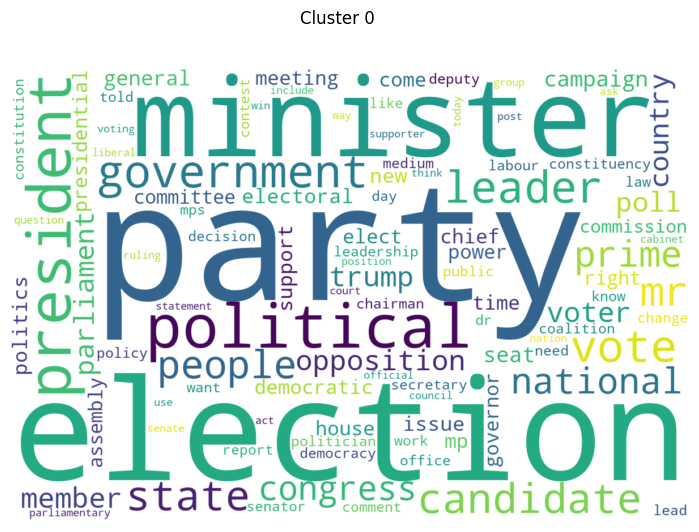

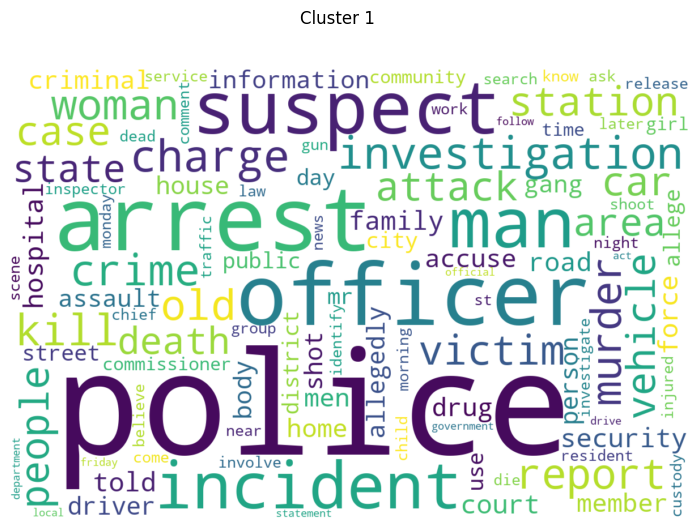

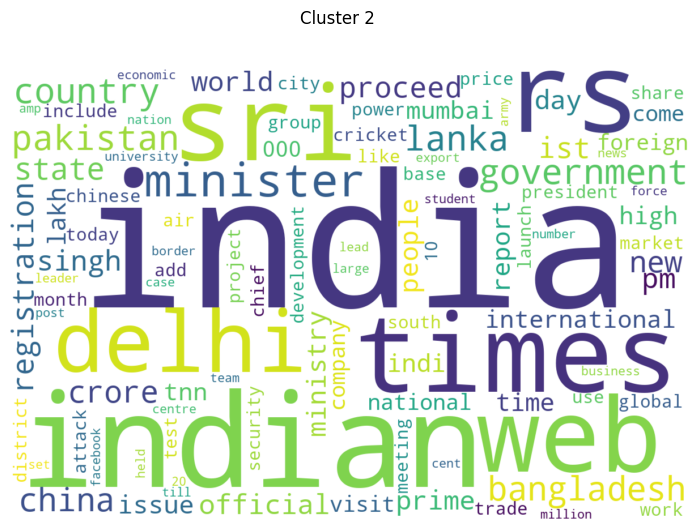

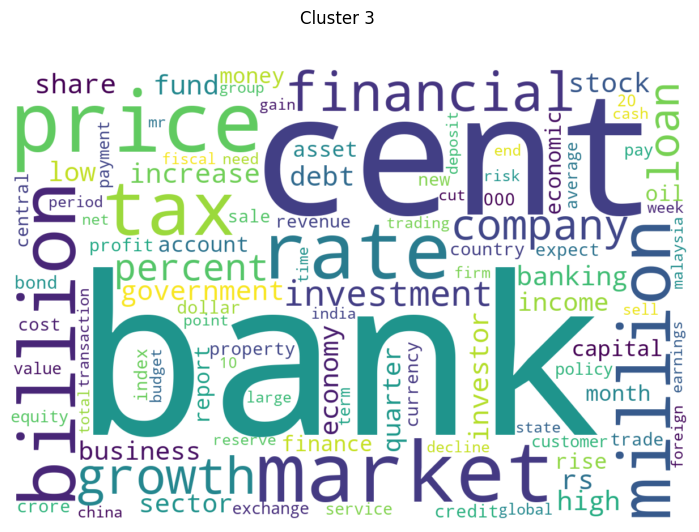

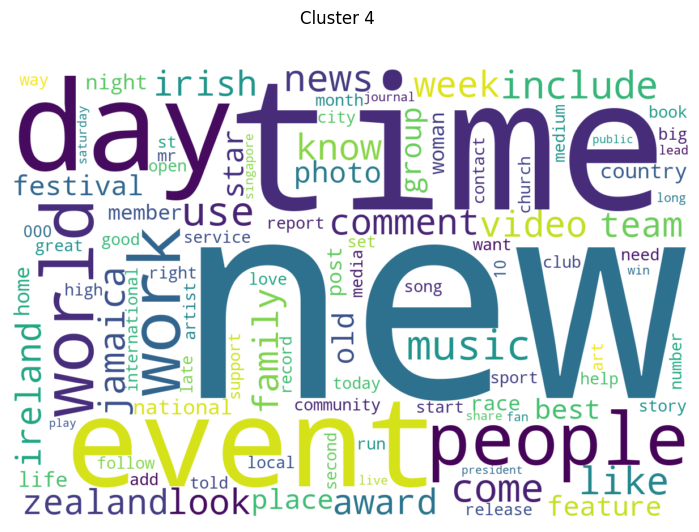

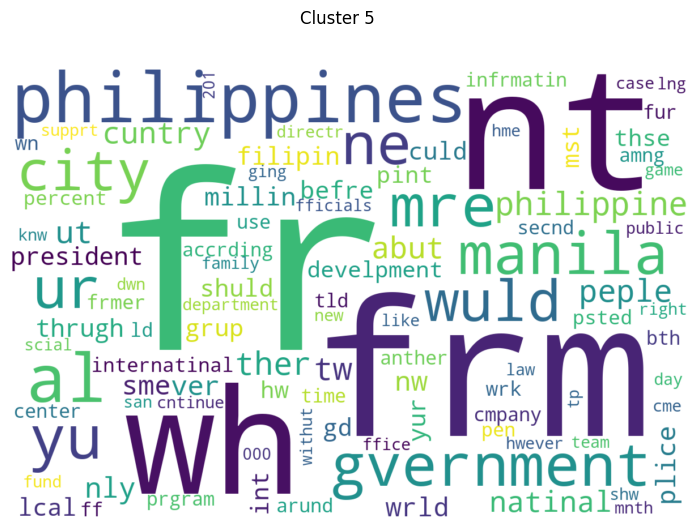

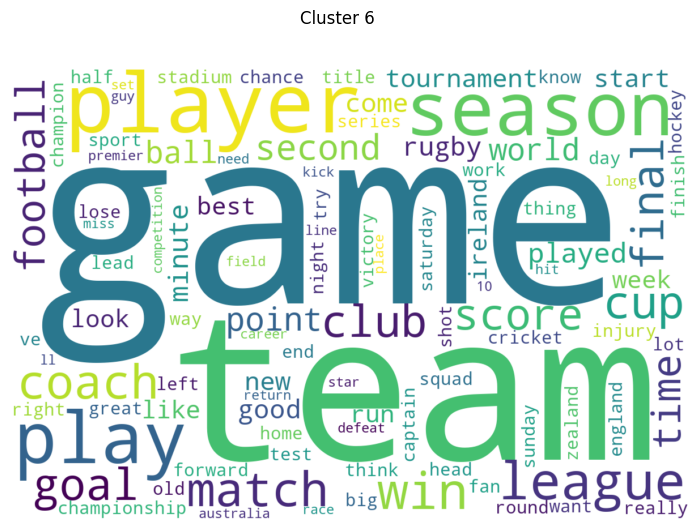

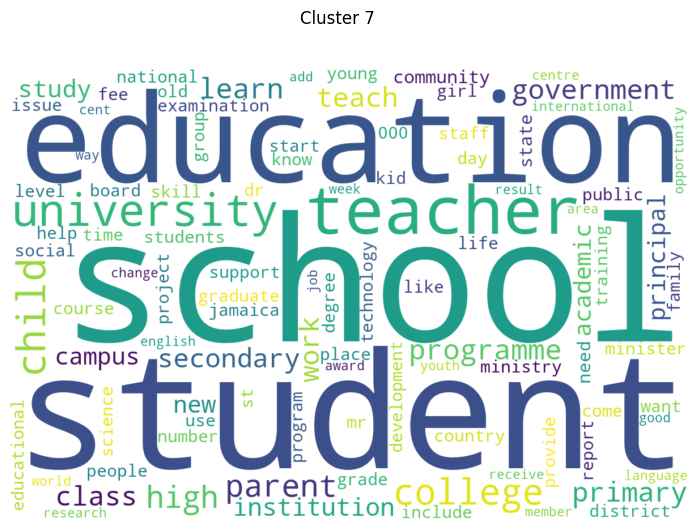

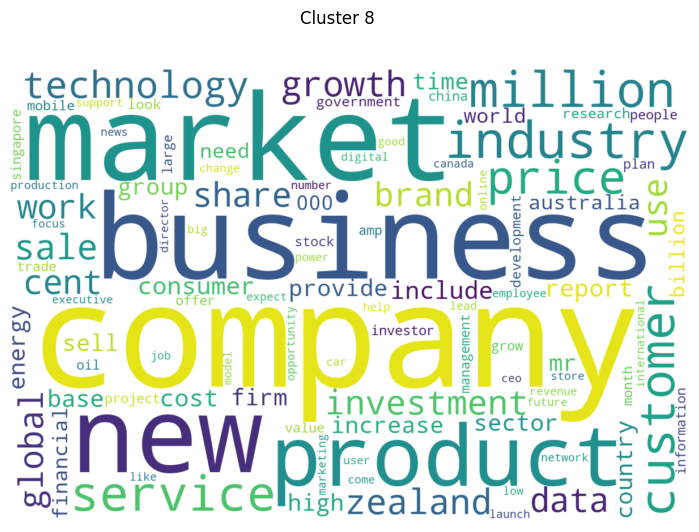

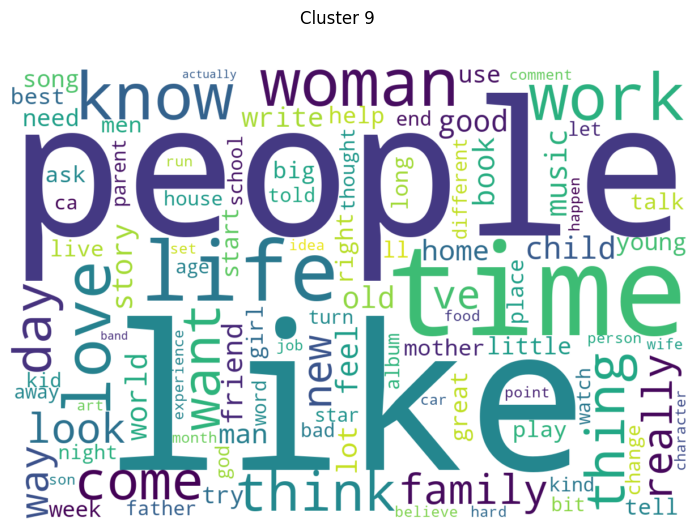

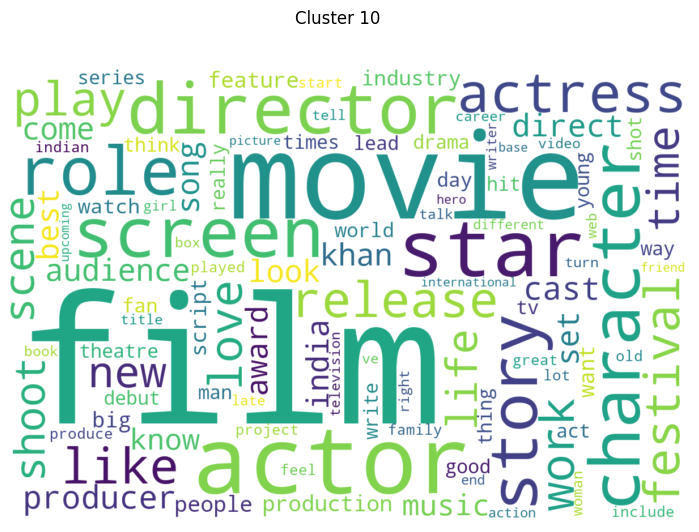

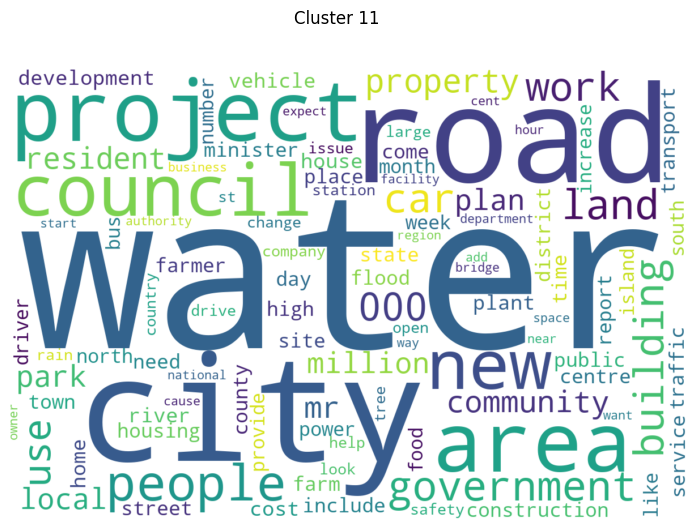

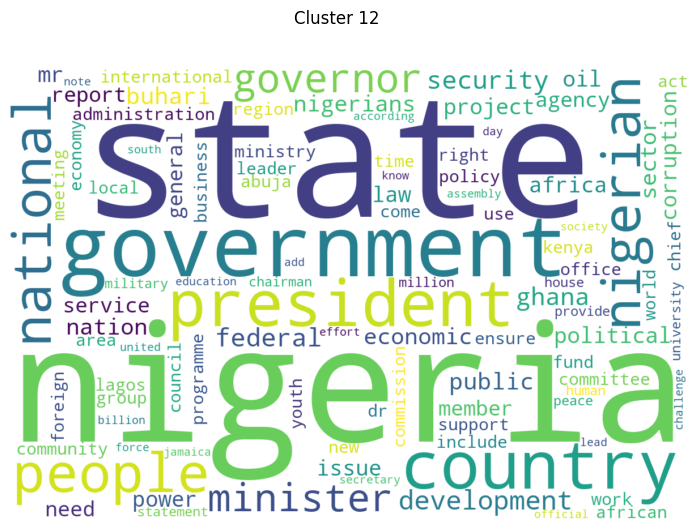

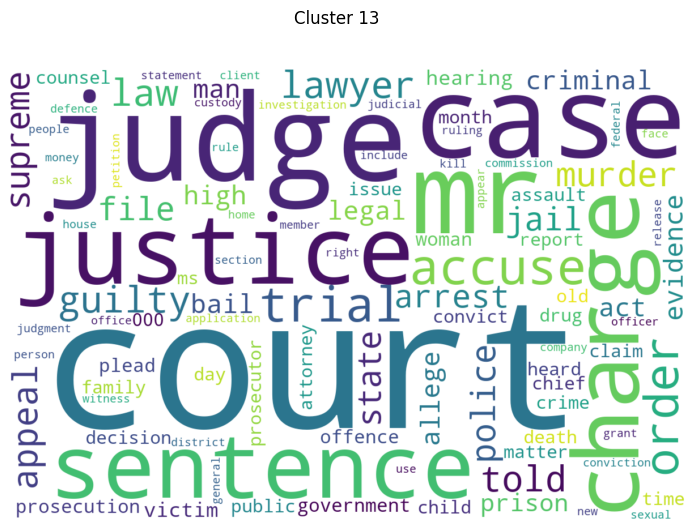

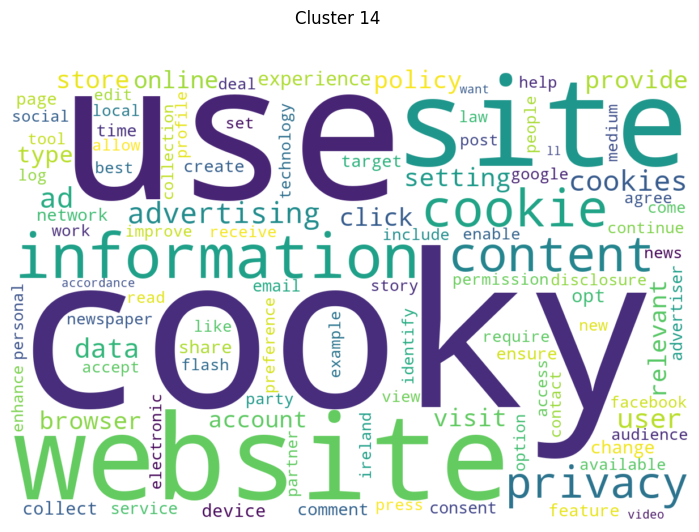

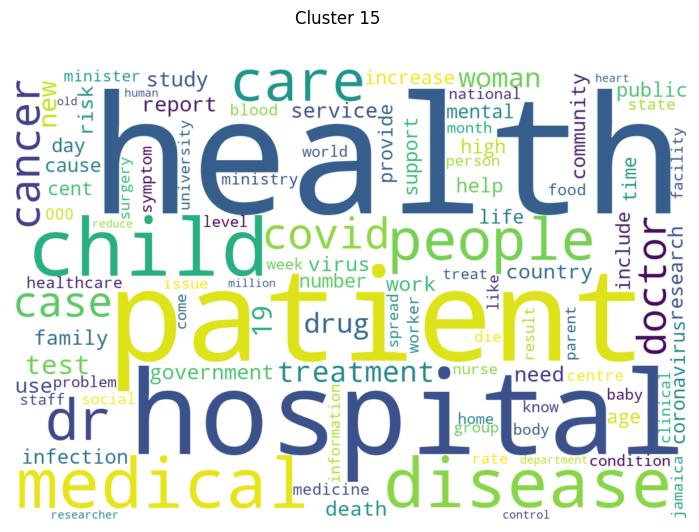

In [61]:
_ = generate_wordclouds(X_svd, tfidf, 16, word_positions)

In [ ]:
####################

In [68]:
#tfidf_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(tfidf_reduced)

In [70]:
pip install WordCloud

     |████████████████████████████████| 160 kB 3.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()

plt.scatter(tfidf_embedded[:, 0], tfidf_embedded[:, 1], marker = "x", c = kmeans.labels_)
plt.show()

In [2]:
#from sklearn.decomposition import PCA

# Set PCA to 2D [sklearn]
#pca = PCA(n_components=2)

# Name of Vector Array (Numpy)
#name_of_vector_array = tfidf_as_array

# New D2 Dataframe (PCA)
#df2d = pd.DataFrame(pca.fit_transform(name_of_vector_array), columns=list('xy'))

# Plot Data Visualization (Matplotlib)
#df2d.plot(kind='scatter', x='x', y='y')
#plt.show()